# How to fit a power law distribution

In [43]:
import networkx as nx
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [44]:
import numpy as np
from operator import itemgetter

In [45]:
%matplotlib inline

## The Powerlaw package
We use the Python toolbox [powerlaw](https://github.com/jeffalstott/powerlaw) that implements a method proposed by Aaron Clauset and collaborators in [this paper](https://arxiv.org/abs/0706.1062).
The paper explains why fitting a power law distribution using a linear regression of logarthim is not correct. 
A more sound approach is based on a Maximum Likelihood Estimator.

The package can be installed using `pip` as `pip install powerlaw`.
Full documentation is available [here](http://pythonhosted.org/powerlaw/).
Several examples and a detailed description of the library has been published in a paper on [PLOS ONE
](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777).

As stated by Clauset, Shalizi and Newman: 
>In practice, we can rarely, if ever, be certain that an observed quantity is drawn from a power-law distribution. The most we can say is that our observations are consistent with the hypothesis that $x$ is drawn from a distribution of the form of $p(x) \propto x^{-\alpha}$. In some cases we may also be able to rule out some other competing hypotheses.

In [46]:
import powerlaw as pwl

## Analysis of ca-AstroPh

We analyze the network file 'ca-AstroPh' from the SNAP repository. 
This is a co-authorhip network, thus, it is undirected.

In [47]:
filepath='./../datasets/ca-AstroPh.txt'

In [48]:
G = nx.read_edgelist(filepath)

In [49]:
print('The network has', len(G), 'nodes and', len(G.edges()), 'links.')

The network has 18772 nodes and 198110 links.


### Degree distribution
Let's plot the degree distribution of the network.

It's important to keep in mind the difference between [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) and [probablity mass function](https://en.wikipedia.org/wiki/Probability_mass_function).

In [50]:
from collections import Counter 
deg=dict(G.degree()).values()
deg_distri=Counter(deg)

In [51]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (5, 3) 
matplotlib.rcParams['figure.dpi'] = 100  
matplotlib.rcParams['font.size'] = 14  


We plot the degree probability mass function.

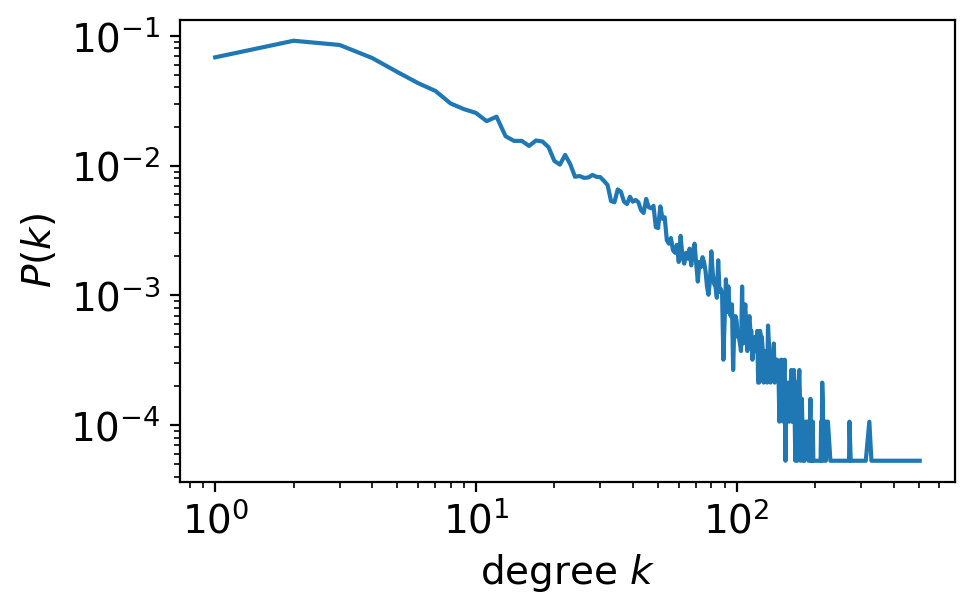

In [52]:
x=[]
y=[]
for i in sorted(deg_distri):   
    x.append(i)
    y.append(deg_distri[i]/G.number_of_nodes())

plt.figure()    
plt.plot(x,y)

plt.xlabel('degree $k$')
plt.ylabel('$P(k)$')

plt.yscale('log')
plt.xscale('log')

Using the 'hist()' function of matplotlib we can plot the probability density distribution, choosing the number of bins.

Text(0, 0.5, '$P(k)$')

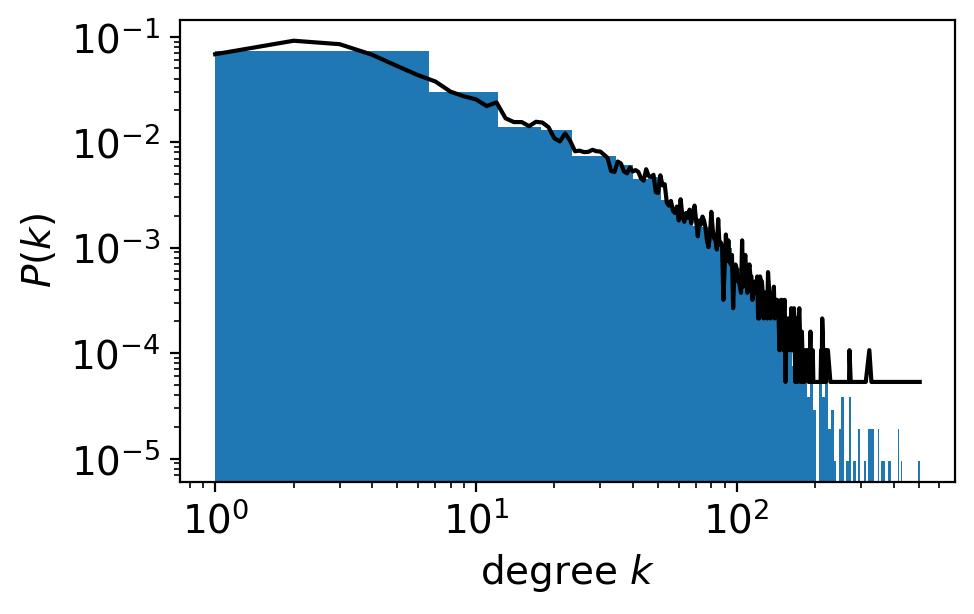

In [53]:
plt.figure()

plt.hist(deg, bins=90, density=True, log=True, histtype='stepfilled')

plt.plot(x,y,'black','o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree $k$')
plt.ylabel('$P(k)$')

The *powerlaw* package provides direct access to the probability density function.

In [54]:
degree=list(deg)

In [55]:
pwl_distri=pwl.pdf(degree, bins=10)

In [56]:
pwl_distri

(array([  1. ,  51.3, 101.6, 151.9, 202.2, 252.5, 302.8, 353.1, 403.4,
        453.7, 504. ]),
 array([1.77382329e-02, 1.59706580e-03, 3.87616767e-04, 9.74337228e-05,
        2.96537417e-05, 1.27087465e-05, 9.53155984e-06, 4.23624882e-06,
        3.17718661e-06, 1.05906220e-06]))

Text(0, 0.5, '$P(k)$')

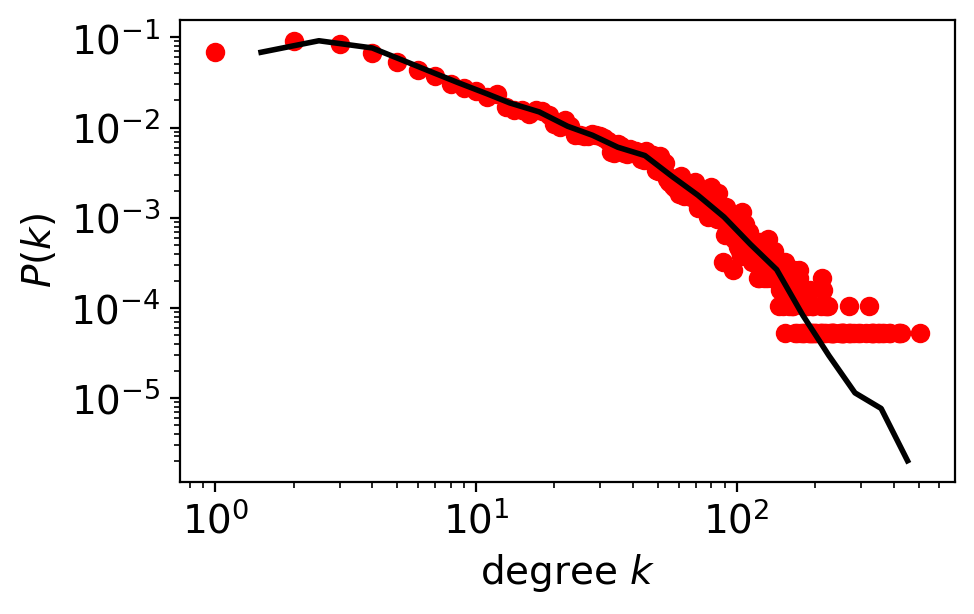

In [57]:
plt.figure()
plt.yscale('log')
plt.xscale('log')

plt.plot(x,y,'ro')

pwl.plot_pdf(degree, color='black', linewidth=2)

plt.xlabel('degree $k$')
plt.ylabel('$P(k)$')

### Linear binning

Text(0, 0.5, '$P(k)$')

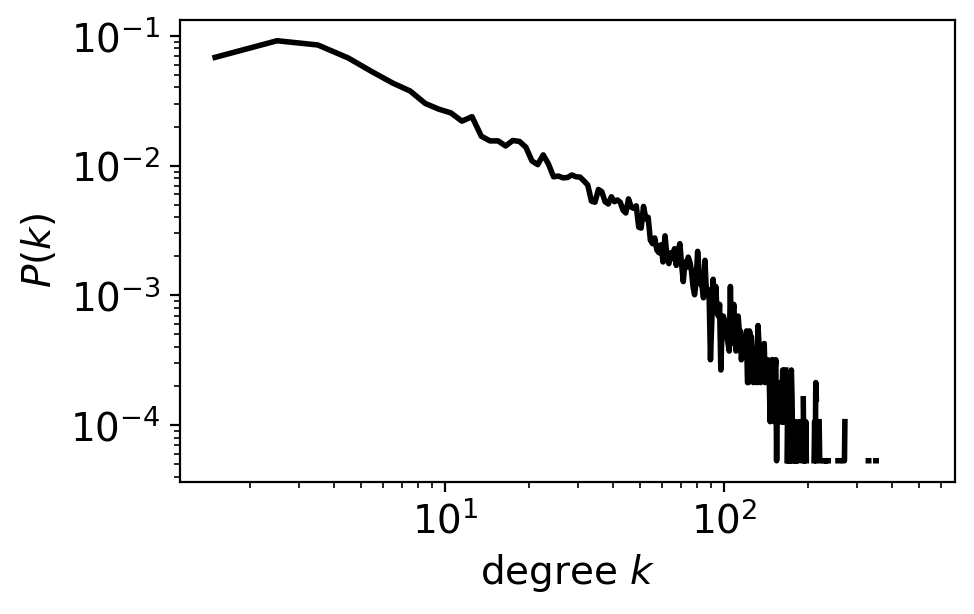

In [58]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
# plt.plot(x,y,'ro')

pwl.plot_pdf(degree, linear_bins=True, color='black', linewidth=2)

plt.xlabel('degree $k$')
plt.ylabel('$P(k)$')

## Parameter estimation

The library powerlaw allows to estimate the exponent $\alpha$ and the minimum value for the scaling $x_{min}$

In [59]:
fit_function = pwl.Fit(degree)

Calculating best minimal value for power law fit


In [60]:
fit_function

In [61]:
fit_function.power_law

In [62]:
fit_function.power_law.alpha

4.543577046506554

In [63]:
fit_function.power_law.xmin

123.0

We fix the minimum value for the scaling $x_{min}=10$

In [64]:
fit_function_fixmin = pwl.Fit(degree, xmin=10)

In [65]:
fit_function_fixmin.xmin

10.0

In [66]:
fit_function_fixmin.power_law.alpha

1.9475409247436344

We can look at the values of the [Kolgomorov-Sminorv distance](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) of the two fits to compare them. Smaller distances correspond to better fits.

In [67]:
fit_function.power_law.D

0.028347190083988588

In [68]:
fit_function_fixmin.power_law.D

0.12754011660628156

## Visualize distributions and fit

Text(0, 0.5, '$P(k)$')

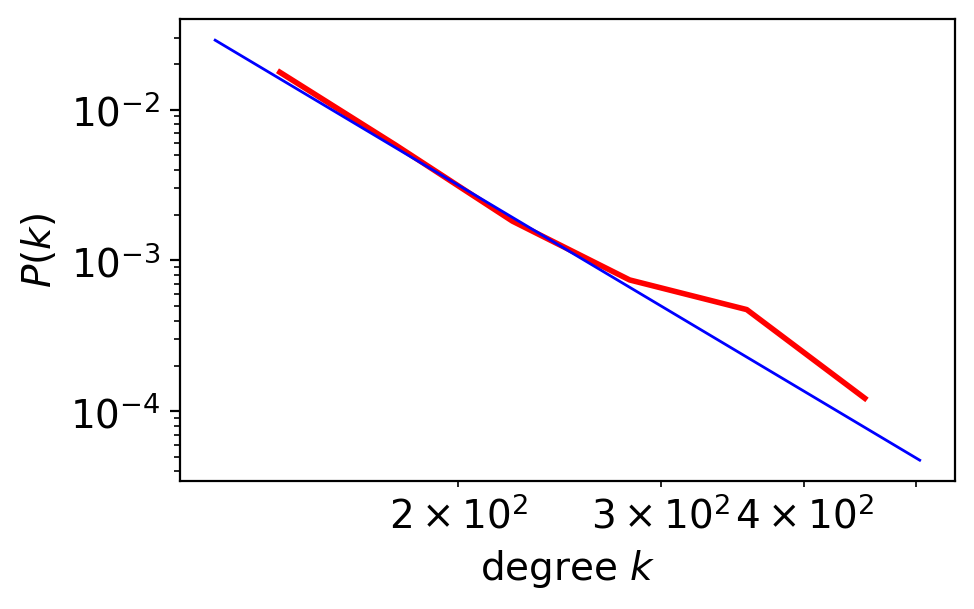

In [69]:
fig=plt.figure()

# plt.plot(x,y,'ro')

fig=pwl.plot_pdf([x for x in degree if x>123], color='r', linewidth=2, label='data')

fit_function.power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='fit')

plt.xlabel('degree $k$')
plt.ylabel('$P(k)$')

Text(0, 0.5, '$P(k)$')

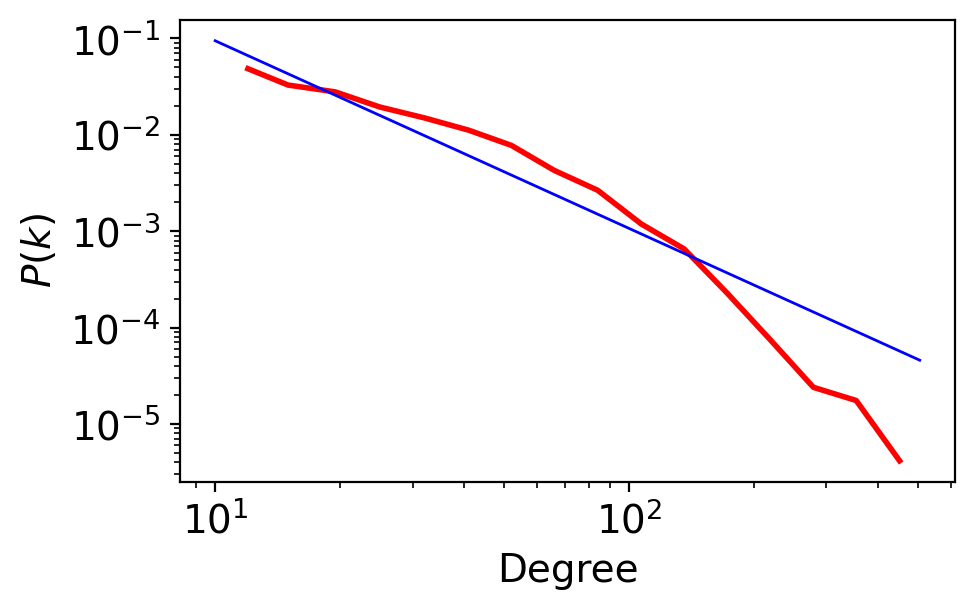

In [70]:
fig=plt.figure()

# plt.plot(x,y,'ro')

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='Fit')

plt.xlabel('Degree')
plt.ylabel('$P(k)$')

## Comparing Candidate Distributions

We can compare the goodness of fit of several distributions. Distributions other than a power-law can provide a better fit to the data.

In [71]:
fit_function.supported_distributions

{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

In [72]:
R,p = fit_function.distribution_compare('power_law', 'exponential', normalized_ratio=True)

In [73]:
R,p

(2.4450468427863137, 0.014483332945893693)

R is the loglikelihood ratio between the two candidate distributions. This number will be positive if the data is more likely in the first distribution, and negative if the data is more likely in the second distribution. The significance value for that direction is p. 

In [74]:
R2,p2 = fit_function.distribution_compare('power_law', 'lognormal_positive', normalized_ratio=True)

In [75]:
R2,p2

(0.26521294560765446, 0.7908454227344833)

In [76]:
R3,p3 = fit_function.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)

Assuming nested distributions


In [77]:
R3,p3

(-0.46891429705144816, 0.5781526627750692)

In [78]:
R4,p4 = fit_function.distribution_compare('power_law', 'stretched_exponential', normalized_ratio=True)

In [79]:
R4,p4

(0.4423707978689595, 0.6582209069980287)

Analyze the power law with $x_{min}=10$.

Here, the truncated power law is the best fit that explains the data. Even an exponential is a better fit to the data.

In [80]:
R,p = fit_function_fixmin.distribution_compare('power_law', 'exponential', normalized_ratio=True)

In [81]:
R,p

(-9.83422144673739, 8.018539959420145e-23)

Text(0, 0.5, '$P(k)$')

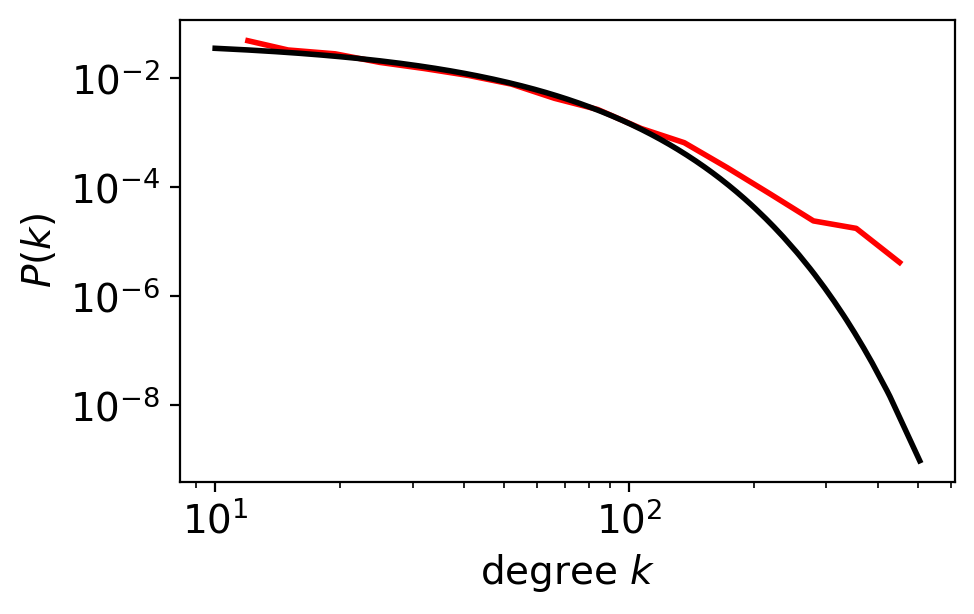

In [82]:
fig=plt.figure()

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.exponential.plot_pdf(ax=fig, color='black', linestyle='-', linewidth=2, label='Fit')

plt.xlabel('degree $k$')
plt.ylabel('$P(k)$')

In [83]:
R3, p3 = fit_function_fixmin.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
R3, p3

Assuming nested distributions


(-28.906628686152743, 0.0)

Text(0, 0.5, '$P(k)$')

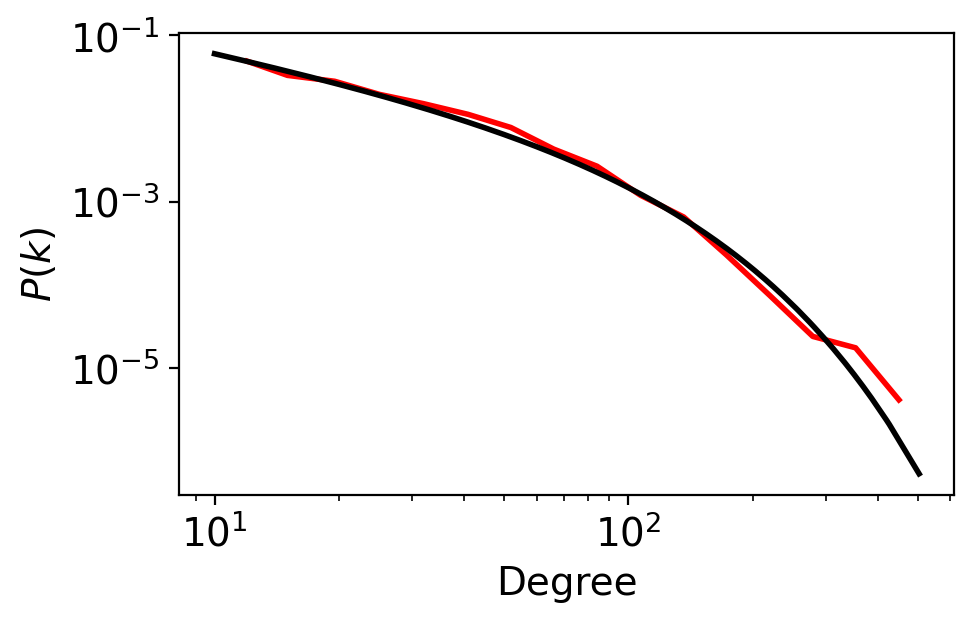

In [84]:
fig=plt.figure()

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.truncated_power_law.plot_pdf(ax=fig, color='black', linestyle='-', linewidth=2, label='Fit')

plt.xlabel('Degree')
plt.ylabel('$P(k)$')